In [1]:
import os   #These two are useful modules
import sys

import numpy as np #Numerical Python

In [2]:
# Let's define te directory where you are with the "get current working directory" command...
work_dir = os.getcwd()
print("I am in dir %s" % work_dir)

#We can go up by using the path.dirname
main_dir =os.path.dirname(work_dir)
print("Main directory is %s" % main_dir)

#We can then define the data directory using the os.path.join command
data_dir = os.path.join(main_dir,"Data")
print("data dir is %s" % data_dir)

#..and we can define some output directory with the results
results_dir = os.path.join(main_dir,"results")

#if the directory does not exist, you can create it...
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created !" % results_dir)

I am in dir /home/jovyan/work/grlmrc/PLS/Code
Main directory is /home/jovyan/work/grlmrc/PLS
data dir is /home/jovyan/work/grlmrc/PLS/Data


### READS FILE FROM dati.tsv
Theese are the datas from Univerity: 1992 students

In [20]:
#define the filename, in this case is in the hw-data/hw01-data directory
data_filename = "dati.tsv"
data_file = open(os.path.join(data_dir,data_filename),"r")  #r means reading mode

#the readlines function gives a list with a line each
lines = data_file.readlines()
#we can create an output list with only the lines that we want
out_list=[]
#we can create an output list with only the lines that we want
out_list=[]
for li in range(len(lines)):
    line = lines[li].strip("\n")
    out_list.append(line)
header="COD_FIS,GENERE,PROV_RES_ATTUALE,COM_RES_ATTUALE,RES_PREC_SIGLA,RES_PREC_DES,DIPARTIMENTO,TIPO_CORSO_COD,TIPO_CORSO_DES,CDS_ID,CDS_COD,AA_IMM1,TIPO_TITOLO_SUP_DESC,TIPO_TITOLO_STRA_DESC,SCUOLA_DESC,COMUNE_SCUOLA_DESC,PROVINCIA_SCUOLA_SIGLA,VOTO_MATURITA,VOTO_MIN,VOTO_MAX,STA_STU_COD,STATO_STU_DESC,MOT_STASTU_COD,MOTIVO_STATO_STU_DESC,CDS_PROV,AA_ARRIVO_FISL,CDS_ARR,AA_PARTENZA_FISL,CDS_COD_L,CDS_DESC_L,VOTO_FINALE,LODE_FLG,ANNO_CT,DATA_CT,AA_ID,COD,DES,VOTO,LODE_FLG_1,CREDITI,DATA_SUP,AA_SUP_ID,RIC_ID,STA_SCE_COD,PRESIDENTE_COMMISSIONE"
column_names = header.split(",")

#create and init a dictionary of lists..
data_dict={}
for ci in range(len(column_names)):
    data_dict[column_names[ci]]=[]
    
#we start from 1 since we want to skip the first line containing the headers.
for ri in range(0,len(out_list)-1):
    if ri >=13496: data_line = out_list[ri+1].split("\t")
    else: data_line = out_list[ri].split("\t")
    if(ri==len(out_list)-2): print("Processing row %d" % ri)
    for ci in range(len(column_names)):
        data_dict[column_names[ci]].append(data_line[ci])
        
header_stud ="COD_FIS,GENERE,AA_IMM1,TIPO_TITOLO_SUP_DESC,PROVINCIA_SCUOLA_SIGLA,VOTO_MATURITA,VOTO_MIN,VOTO_MAX,STATO_STU_DESC,MOTIVO_STATO_STU_DESC,CDS_PROV,AA_ARRIVO_FISL,CDS_ARR,AA_PARTENZA_FISL,CDS_DESC_L,VOTO_FINALE,LODE_FLG,AA_ID"
colonne = header_stud.split(",")
studente={}
studente['MEDIA_VOTO']=[]
for ci in range(len(colonne)):
    studente[colonne[ci]]=[]
print("header contains %d columns" % len(colonne))
print(colonne)    

count=0
vuoti=0
#inizializza la sintesi dei dati imponendo che il numero della riga sia minore del numero totale di righe
while (count < 18936):
#Esiste un voto associato alla riga? Se sì: proseguo con l'analisi. Se no: passo alla riga successiva
    if(data_dict['VOTO'][count]):
#associo al valore 'temp' il rodotto del voto associato alla riga con i crediti associati alla riga
        crediti=int(data_dict['CREDITI'][count])
        temp=int(data_dict['VOTO'][count])*crediti
#inizializzo il contatore di ripetizioni per codice fiscale
        ro=1
#finchè il codice fiscale della riga è uguale a quello delle successive sommo i valori di 'temp' per ciascuna riga successiva ed i valori dei crediti totali
        while (data_dict["COD_FIS"][count]==data_dict["COD_FIS"][count+ro]):
#Esegue solo se esiste un valore di voto associato a ciascuna delle righe successive
            if(data_dict['VOTO'][count+ro]):
                temp=temp+(int(data_dict['VOTO'][count+ro])*int(data_dict['CREDITI'][count+ro]))
                crediti=crediti+int(data_dict['CREDITI'][count+ro])
            ro=ro+1
#Associo i valori del nuovo dizionario studente
        for ci in range(len(colonne)):
            studente[colonne[ci]].append(data_dict[colonne[ci]][count])
        studente['MEDIA_VOTO'].append(int(temp/crediti))
#stabilisco la nuova riga di partenza come quella per la quale non è più vero che si ripete lo stesso codice fiscale
        count=count+ro
    else:
#prima di passare alla riga successiva aggiungo una unità al numero di studenti che non hanno voti associati, se non, al massimo, una ideoneità linguistica
        if(count < 18935):
#considero i casi di idoneità linguistica ed evito che gli studenti vengano contati due volte
            if(data_dict["COD_FIS"][count]!=data_dict["COD_FIS"][count+1]): 
                vuoti=vuoti+1
                for ci in range(len(colonne)):
                    studente[colonne[ci]].append(data_dict[colonne[ci]][count])
                studente['MEDIA_VOTO'].append(int(temp/crediti))
        count=count+1

Processing row 18935
header contains 18 columns
['COD_FIS', 'GENERE', 'AA_IMM1', 'TIPO_TITOLO_SUP_DESC', 'PROVINCIA_SCUOLA_SIGLA', 'VOTO_MATURITA', 'VOTO_MIN', 'VOTO_MAX', 'STATO_STU_DESC', 'MOTIVO_STATO_STU_DESC', 'CDS_PROV', 'AA_ARRIVO_FISL', 'CDS_ARR', 'AA_PARTENZA_FISL', 'CDS_DESC_L', 'VOTO_FINALE', 'LODE_FLG', 'AA_ID']


In [22]:
#define the filename, in this case is in the hw-data/hw01-data directory
data_filename = "dati_ordinati_ridotti_CISIA_AI04_Scienze.txt"
data_file = open(os.path.join(data_dir,data_filename),"r")  #r means reading mode

#the readlines function gives a list with a line each
lines = data_file.readlines()

#we can create an output list with only the lines that we want
out_list=[]

for li in range(len(lines)):
    line = lines[li].strip("\n")
    if (len(line)>0):
        if (line[0]!="#"):
            #print(line)
            out_list.append(line)
            
header = out_list[0]

# We can ue the split function to split a long string. 
# Here we use the comma as separator, but one can use also other characters
column_names = header.split("; ")
print("header contains %d columns" % len(column_names))
print(column_names)

studente_cisia={}
for ci in range(len(column_names)):
    studente_cisia[column_names[ci]]=[]


#we start from 1 since we want to skip the first line containing the headers.
for ri in range(1,len(out_list)):
    data_line = out_list[ri].split("; ")
    if(ri==len(out_list)-1): print("Processing row %d" % ri)
    for ci in range(len(column_names)):
        studente_cisia[column_names[ci]].append(data_line[ci])

header contains 8 columns
['Codice fiscale', 'Tentativo', 'Data', 'Sede', 'Punteggio', 'Risposte corrette', 'Risposte errate', 'Risposte Nulle']
Processing row 455


(array([ 45.,  78.,  88., 207., 317., 450., 199., 194., 177., 237.]),
 array([18. , 19.2, 20.4, 21.6, 22.8, 24. , 25.2, 26.4, 27.6, 28.8, 30. ]),
 <BarContainer object of 10 artists>)

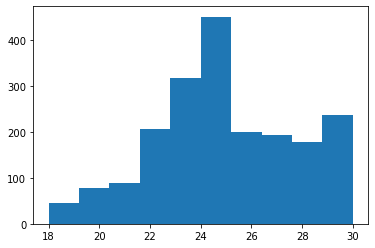

In [24]:
import matplotlib.pyplot as plt
plt.hist(studente["MEDIA_VOTO"])

In [30]:
cor=0
for ri in range(len(studente['COD_FIS'])):
    for li in range(len(studente_cisia['Codice fiscale'])):
        if(studente_cisia['Codice fiscale'][li]==studente['COD_FIS'][ri]): 
            cor=cor+1
            print(studente_cisia['Codice fiscale'][li], li, studente['COD_FIS'][ri], ri)
print(cor)

RSSNGL99T11G273R 270 RSSNGL99T11G273R 3
PLLGLL00T20G273E 166 PLLGLL00T20G273E 4
MZZMTT00P19A089L 172 MZZMTT00P19A089L 5
CCCLNE99T68I156O 416 CCCLNE99T68I156O 18
PRNGRL00B10G157S 384 PRNGRL00B10G157S 19
RSSGRG99M42I537A 363 RSSGRG99M42I537A 23
PTTDVD99H14A326D 243 PTTDVD99H14A326D 24
PLLMRC99C09A326Q 220 PLLMRC99C09A326Q 25
GRRFPP99A12A326U 353 GRRFPP99A12A326U 26
MNSLNZ00E09A515B 280 MNSLNZ00E09A515B 44
LBRGLI99M26G878R 355 LBRGLI99M26G878R 45
MNCFNC99H17A390P 364 MNCFNC99H17A390P 55
CNTGLI00H19A390D 30 CNTGLI00H19A390D 56
BRBSFN00A28L407R 181 BRBSFN00A28L407R 57
RNZFNC01A31F656N 26 RNZFNC01A31F656N 58
CNLLSN00L03D869P 28 CNLLSN00L03D869P 59
MRNTMS00L30F656D 58 MRNTMS00L30F656D 60
CSCFNC00T20A390M 12 CSCFNC00T20A390M 61
LPPVVN01A45H096O 95 LPPVVN01A45H096O 93
CLDGPP00E16L109B 99 CLDGPP00E16L109B 94
DSTSFN01C02L109X 50 DSTSFN01C02L109X 95
TFLFNC00M05A662E 161 TFLFNC00M05A662E 96
CPNTSM00D69I330H 0 CPNTSM00D69I330H 97
CPNTSM00D69I330H 1 CPNTSM00D69I330H 97
DPNLSS00H44A794T 66 DPNLSS00H44

In [36]:
cor=0
for ri in range(len(studente['COD_FIS'])):
    for li in range(len(studente['COD_FIS'])):
        if(li!=ri):
            if(studente['COD_FIS'][li]==studente['COD_FIS'][ri]):
                print(ri,li,studente['COD_FIS'][li])
                cor=cor+1
            #print(studente_cisia['Codice fiscale'][li], li, studente['COD_FIS'][ri], ri)
print(cor)

22 27 DHRSPH96H51A326T
27 22 DHRSPH96H51A326T
33 37 DLZDNL96C19H769Y
34 38 RCCLSN96M12A271K
37 33 DLZDNL96C19H769Y
38 34 RCCLSN96M12A271K
52 54 STTNDR97H17I155P
54 52 STTNDR97H17I155P
115 123 GLLVNT95C51A509E
123 115 GLLVNT95C51A509E
139 141 FLLDDP96E04B180E
141 139 FLLDDP96E04B180E
154 156 MNSNRC93H29A669Q
156 154 MNSNRC93H29A669Q
218 223 BGNLRS93M06D205L
223 218 BGNLRS93M06D205L
253 255 BRZCRN81E52B774G
253 260 BRZCRN81E52B774G
254 261 MRNDNN00D57Z604O
255 253 BRZCRN81E52B774G
255 260 BRZCRN81E52B774G
260 253 BRZCRN81E52B774G
260 255 BRZCRN81E52B774G
261 254 MRNDNN00D57Z604O
308 313 RSSDRN96T61E885X
313 308 RSSDRN96T61E885X
365 377 GNTFTH98P07D403G
372 385 CNTLPA99L24D612L
375 388 MNTLCR00A28Z611M
377 365 GNTFTH98P07D403G
385 372 CNTLPA99L24D612L
388 375 MNTLCR00A28Z611M
391 396 FRSCLD94S17F205Z
396 391 FRSCLD94S17F205Z
447 457 LMAMNL97B10F032A
448 453 RMZLGU59L23C310F
448 462 RMZLGU59L23C310F
453 448 RMZLGU59L23C310F
453 462 RMZLGU59L23C310F
454 461 BRTDRD95M25G088I
457 447 LMAMNL97

In [28]:
print(len(studente_cisia['Codice fiscale']))

455
